Files already downloaded and verified
Files already downloaded and verified
Test Loss: 2.543403

Test Accuracy of apple: 70% (70/100)
Test Accuracy of aquarium_fish: 35% (35/100)
Test Accuracy of  baby: 23% (23/100)
Test Accuracy of  bear: 11% (11/100)
Test Accuracy of beaver: 21% (21/100)
Test Accuracy of   bed: 23% (23/100)
Test Accuracy of   bee: 28% (28/100)
Test Accuracy of beetle: 34% (34/100)
Test Accuracy of bicycle: 50% (50/100)
Test Accuracy of bottle: 34% (34/100)
Test Accuracy of  bowl: 10% (10/100)
Test Accuracy of   boy:  7% ( 7/100)
Test Accuracy of bridge: 34% (34/100)
Test Accuracy of   bus: 17% (17/100)
Test Accuracy of butterfly: 21% (21/100)
Test Accuracy of camel: 10% (10/100)
Test Accuracy of   can: 27% (27/100)
Test Accuracy of castle: 59% (59/100)
Test Accuracy of caterpillar: 20% (20/100)
Test Accuracy of cattle: 15% (15/100)
Test Accuracy of chair: 59% (59/100)
Test Accuracy of chimpanzee: 58% (58/100)
Test Accuracy of clock: 18% (18/100)
Test Accuracy of clou

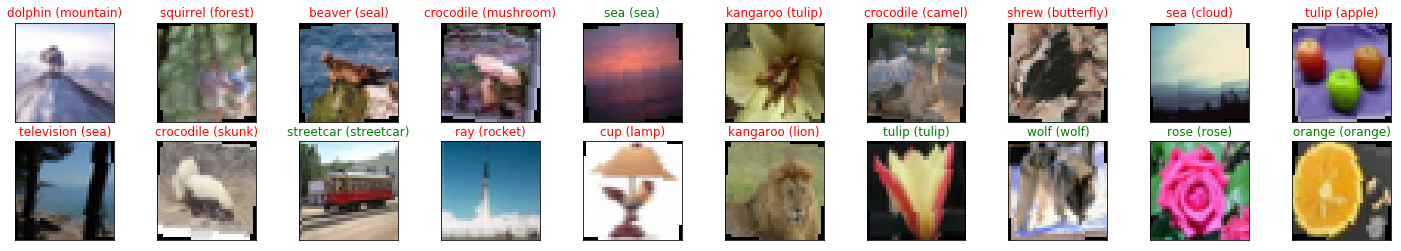

In [1]:
import torch
import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()
  
    
    
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation
valid_size = 0.2

# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(), # randomly flip and rotate
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

# choose the training and test datasets
train_data = datasets.CIFAR100(r'C:\Users\Ahmed\Desktop\data', train=True,
                              download=True, transform=transform)
test_data = datasets.CIFAR100(r'C:\Users\Ahmed\Desktop\data', train=False,
                             download=True, transform=transform)

# obtain training indices that will be used for validation
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

# prepare data loaders (combine dataset and sampler)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, 
    num_workers=num_workers)

# specify the image classes
classes = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]        



import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer (sees 32x32x3 image tensor)
        self.conv1 = nn.Conv2d(3, 32, 5, padding=3)
        # Batch Norm Layer
        self.conv1_bn = nn.BatchNorm2d(32)
        # convolutional layer (sees 16x16x32 tensor)
        self.conv2 = nn.Conv2d(32, 64, 5, padding=1)
        # Batch Norm Layer
        self.conv2_bn = nn.BatchNorm2d(64)
        # convolutional layer (sees 8x8x64 tensor)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        # Batch Norm Layer
        self.conv3_bn = nn.BatchNorm2d(128)
        # convolutional layer (sees 4x4x128 tensor)
        self.conv4 = nn.Conv2d(128, 256, 1, padding=1)
        # Batch Norm Layer
        self.conv4_bn = nn.BatchNorm2d(256)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # linear layer (256 * 2 * 2 -> 500)
        self.fc1 = nn.Linear(256 * 2 * 2, 512)
        # linear layer (500 -> 100)
        self.fc2 = nn.Linear(512, 100)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.conv1_bn(self.pool(self.conv1(x)))
        # add dropout layer
        x = self.dropout(x)
        x = self.conv2_bn(self.pool(self.conv2(x)))
        # add dropout layer
        x = self.dropout(x)
        x = self.conv3_bn(self.pool(self.conv3(x)))
        # add dropout layer
        x = self.dropout(x)
        x = self.conv4_bn(self.pool(self.conv4(x)))
        # add dropout layer
        x = self.dropout(x)
        # flatten image input
        x = x.view(-1, 256 * 2 * 2)
        # add dropout layer
        x = self.dropout(x)
        
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        return x
# create a complete CNN
model = Net()
#print(model)

# move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()
    
    
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)
    
model.load_state_dict(torch.load('model_cifar_100.pt'))


# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(100))
class_total = list(0. for i in range(100))

model.eval()
# iterate over test data
for batch_idx, (data, target) in enumerate(test_loader):
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(100):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))


import matplotlib.pyplot as plt
%matplotlib inline
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image
    
    
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

# move model inputs to cuda, if GPU available
if train_on_gpu:
    images = images.cuda()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))